In [ ]:
#Word Frequency Analysis

In [1]:
import pandas as pd

df = pd.read_csv('FILEA.csv')
df.head()

,ProjectNumber,Lead,RecipientName,RecipientType,Indigenous,VulnerableGroups,Town_City_Community,Province_Territory,PostalCode,ContactName,...,ApprovedFunding_AAFC,TotalApproved_Funding,DateApproved_Rejected,Date_Paid,Type_of_Investment,Description,NumberPeopleServed,Notes,PageIndex,FundingEfficiency_AAFC_Approved_Funding
0,521-1,Breakfast Club of Canada,100 Mile Elementary,School/Educational Centre,No,Youth,100 Mile House,BC,NaN,NaN,...,12600.0,NaN,2/16/2021,3/26/2021,"Funds for ""Food & Meals""",NaN,125,NaN,1&2,0.009920635
1,521-1,Breakfast Club of Canada,100 Mile Elementary,School/Educational Centre,No,Youth,100 Mile House,BC,NaN,NaN,...,1400.0,NaN,2/16/2021,3/26/2021,"Funds for ""Food Distribution""",NaN,125,NaN,1&2,0.089285714
2,521-10,Breakfast Club of Canada,Angik School,School/Educational Centre,Inuit,Youth,Paulatuk,NT,NaN,NaN,...,NaN,NaN,5/31/2021,5/31/2021,Food and Meals,NaN,48,NaN,1&2,FENA
3,521-10,Breakfast Club of Canada,Angik School,School/Educational Centre,Inuit,Youth,Paulatuk,NT,NaN,NaN,...,NaN,NaN,5/31/2021,5/31/2021,"Funds for ""Food & Meals""",NaN,48,NaN,1&2,FENA
4,521-10,Breakfast Club of Canada,Angik School,School/Educational Centre,Inuit,Youth,Paulatuk,NT,NaN,NaN,...,6000.0,NaN,2/16/2021,3/31/2021,"Funds for ""Food & Meals""",NaN,62,NaN,1&2,0.010333333


In [3]:
df.columns

Index(['ProjectNumber', 'Lead', 'RecipientName', 'RecipientType', 'Indigenous',
       'VulnerableGroups', 'Town_City_Community', 'Province_Territory',
       'PostalCode', 'ContactName', 'ContactPhone', 'ContactEmail', 'Status',
       'TotalRequested', 'ApprovedFunding_NonAAFC', 'ApprovedFunding_AAFC',
       'TotalApproved_Funding', 'DateApproved_Rejected', 'Date_Paid',
       'Type_of_Investment', 'Description', 'NumberPeopleServed', 'Notes',
       'PageIndex', 'FundingEfficiency_AAFC_Approved_Funding'],
      dtype='object')

In [ ]:
#using Notes column for Analysis
dfn = pd.DataFrame().assign(Notes=df['Notes'])

In [ ]:
dfn.isna().sum()

Notes    5913
dtype: int64

In [ ]:
#dropping the null text
dfn.dropna(axis='rows',subset=['Notes'],inplace=True)
# after filtering resetting the index of the dataframe
dfn.reset_index(drop=True,inplace=True)

In [ ]:
import re
import string

In [ ]:
#Processing text for tokenization
def clean_text(text):    
    text_nonum = re.sub(r'\d+', '', text)
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

cleaner=[]
for i in range(len(dfn)):
  cleaner.append(clean_text(dfn['Notes'][i]))
dfn['cleaned_text']=cleaner


In [ ]:
dfn['cleaned_text'].str.strip()
dfn.head()

,Notes,cleaned_text
0,000058,
1,000060,
2,000062,
3,000064,
4,000066,


In [ ]:
import numpy as np
#replacing empty space with null values

dfn['cleaned_text'].replace('', np.nan, inplace=True)

In [ ]:
#dropping cleaned_text null rows
dfn.dropna(subset=['cleaned_text'], inplace=True)
dfn.head()

,Notes,cleaned_text
273,"Women; Youth, Seniors, Official language minor...",women youth seniors official language minority...
275,Women,women
279,Youth; Visible Minorities,youth visible minorities
281,"Seniors, Visible Minorities 000614",seniors visible minorities
282,"Youth, Seniors, Visible Minorities, Disabled P...",youth seniors visible minorities disabled persons


In [ ]:
# after filtering have resetting the index of the dataframe
dfn.reset_index(drop=True, inplace=True)

In [ ]:
dfn.head(3)

,Notes,cleaned_text
0,"Women; Youth, Seniors, Official language minor...",women youth seniors official language minority...
1,Women,women
2,Youth; Visible Minorities,youth visible minorities


In [ ]:
#install NLP package nltk for wordfrequency analysis

In [ ]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
dfn['text_tokens'] = [word_tokenize(this_text) for this_text in dfn.cleaned_text]

In [ ]:
dfn.text_tokens

0       [women, youth, seniors, official, language, mi...
1                                                 [women]
2                            [youth, visible, minorities]
3                          [seniors, visible, minorities]
4       [youth, seniors, visible, minorities, disabled...
                              ...                        
4227                     [black, and, people, of, colour]
4228                     [black, and, people, of, colour]
4229    [womenyouth, of, the, people, we, serve, are, ...
4230                                         [indigenous]
4231    [indigenouswomenyouthseniorspeople, of, disabi...
Name: text_tokens, Length: 4232, dtype: object

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# set stopwords and appending special characters
stop_words = list(set(stopwords.words('english')))
stop_words.append("’")
print(stop_words)

['ain', 'because', 'ourselves', 'ours', 'again', 'just', 'm', "shan't", 'once', 'isn', 'he', 'what', 'his', 'having', 'during', 'up', 'in', 'it', 'yours', 'did', 'an', 'why', 'no', 'should', "hasn't", 'wouldn', 'had', 'against', "you've", "isn't", "shouldn't", 'here', "couldn't", 'me', 'but', 'needn', 'we', 'a', 'myself', 'their', "that'll", 'too', "weren't", 'are', 'not', 'nor', 'my', 'to', 'himself', 'have', 'before', 'that', 'shouldn', 'into', 'i', 'on', 'him', 'o', 'she', 'been', 'do', 't', 'will', 'its', 'only', 'as', 'aren', "needn't", 'they', 'where', 'over', 'haven', 'further', 'was', 'by', 'itself', 'out', "doesn't", 'wasn', 'all', 've', 'your', 'more', "didn't", 'them', 'other', 'her', 'now', 'than', "won't", 'has', 'through', 'which', 'each', 'so', 'same', 'this', 'after', 'd', 'then', 'weren', "aren't", 'some', 'between', 'mustn', "she's", 'hasn', 'll', 'for', 'am', 'our', 'couldn', 'herself', 'can', 'above', 'own', 'from', "should've", 'doesn', 'most', 'is', 'under', 'or',

In [ ]:
#removing stopwords

results_tkns = []
for i in range(len(dfn)):
  results_tkns.append([token for token in dfn['text_tokens'][i] if token not in stop_words])

dfn['tt_nosw'] = results_tkns

In [ ]:
import itertools
noteslist = list(itertools.chain(*results_tkns))

In [ ]:
dfn.head(3)

,Notes,cleaned_text,text_tokens,tt_nosw
0,"Women; Youth, Seniors, Official language minor...",women youth seniors official language minority...,"[women, youth, seniors, official, language, mi...","[women, youth, seniors, official, language, mi..."
1,Women,women,[women],[women]
2,Youth; Visible Minorities,youth visible minorities,"[youth, visible, minorities]","[youth, visible, minorities]"


In [ ]:
#FreqDistChart
#https://dariuslfuller.medium.com/creating-visuals-with-nltks-freqdist-ac4e667e49f3

In [ ]:
import seaborn as sns
from nltk.probability import FreqDist
all_fdist = FreqDist(noteslist).most_common(20)

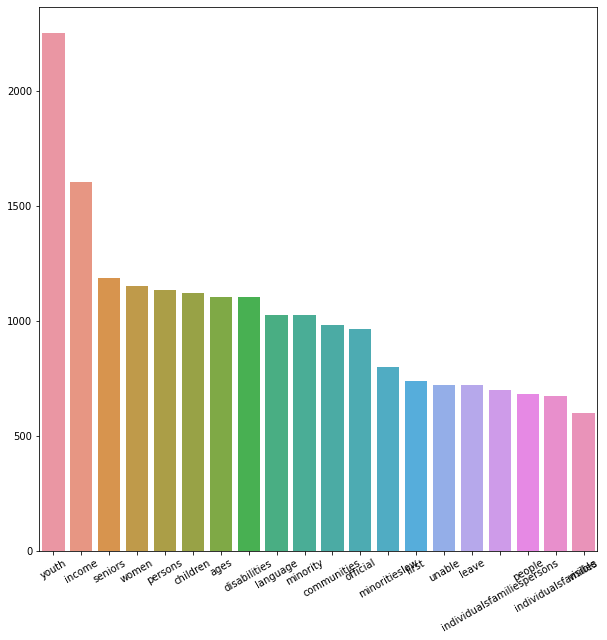

In [ ]:
## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

---------------WC of Notes File A---------------


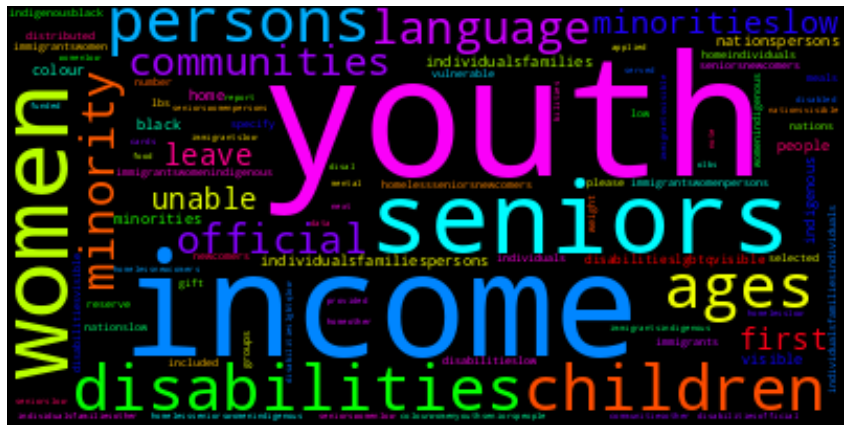

In [ ]:
#plotting visualization
from collections import Counter
dictionary = Counter(noteslist)
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
print("---------------"+"WC of Notes File A"+"---------------")
plt.figure(figsize=(15,18))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()